
# vision.transform

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.vision import * 
from fastai import *

`vision.transform` provides classes and functions to handle data augmentation in computer vision.

## Data augmentation

If you want to quickly get a set of random transforms that have proved to work well in a wide range of tasks, you should use the `get_transforms` function. The most important parameters to adjust are *do\_flip* and *flip\_vert*, depending on the type of images you have.

In [ ]:
show_doc(get_transforms,  arg_comments={
    'do_flip': 'if True, a random flip is applied with probability 0.5',
    'flip_vert': 'requires do_flip=True. If True, the image can be flipped vertically or rotated of 90 degrees, otherwise only an horizontal flip is applied',
    'max_rotate': 'if not None, a random rotation between -max\_rotate and max\_rotate degrees is applied with probability p\_affine',
    'max_zoom': 'if not 1. or less, a random zoom betweem 1. and max\_zoom is applied with probability p\_affine',
    'max_lighting': 'if not None, a random lightning and contrast change controlled by max\_lighting is applied with probability p\_lighting',
    'max_warp': 'if not None, a random symmetric warp of magnitude between -max\_warp and maw\_warp is applied with probability p\_affine',    
    'p_affine': 'the probability that each affine transform and symmetric warp is applied',
    'p_lighting': 'the probability that each lighting transform is applied',
    'xtra_tfms': 'a list of additional transforms you would like to be applied'
})

#### <a id=get_transforms></a>`get_transforms`
(`do_flip`:`bool`=`True`, `flip_vert`:`bool`=`False`, `max_rotate`:`float`=`10.0`, `max_zoom`:`float`=`1.1`, `max_lighting`:`float`=`0.2`, `max_warp`:`float`=`0.2`, `p_affine`:`float`=`0.75`, `p_lighting`:`float`=`0.75`, `xtra_tfms`:`float`=`None`) -> `Collection`[`Transform`]


Utility func to easily create list of `flip`, `rotate`, `zoom`, `warp`, `lighting` transforms

- *do_flip*: if True, a random flip is applied with probability 0.5
- *flip_vert*: requires do_flip=True. If True, the image can be flipped vertically or rotated of 90 degrees, otherwise only an horizontal flip is applied
- *max_rotate*: if not None, a random rotation between -max\_rotate and max\_rotate degrees is applied with probability p\_affine
- *max_zoom*: if not 1. or less, a random zoom betweem 1. and max\_zoom is applied with probability p\_affine
- *max_lighting*: if not None, a random lightning and contrast change controlled by max\_lighting is applied with probability p\_lighting
- *max_warp*: if not None, a random symmetric warp of magnitude between -max\_warp and maw\_warp is applied with probability p\_affine
- *p_affine*: the probability that each affine transform and symmetric warp is applied
- *p_lighting*: the probability that each lighting transform is applied
- *xtra_tfms*: a list of additional transforms you would like to be applied

To get a sense of what each of those transforms is doing see below the complete list of transforms. First let's note that the [open_image]('fastai.vision.data.html#open_image') function that is used in the computer vision datasets to load the images from disk return an `Image` object.

In [ ]:
open_image('imgs/cat_example.jpg')

Image (torch.Size([3, 500, 394]))

The `Image` class is documented in details later. It's just a wrapper that contains the tensor of pixels corresponging to the image and will internally handle all the transformations we're applying to the picture, but at a first glance you only need to know that you can easily see the corresponding picture with the `show` method:

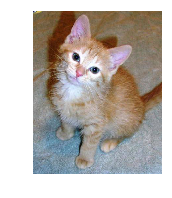

In [ ]:
open_image('imgs/cat_example.jpg').show()

and that the underlying data is in the `data` property of the object:

In [ ]:
open_image('imgs/cat_example.jpg').data

tensor([[[0.1294, 0.0863, 0.0392,  ..., 0.4706, 0.4941, 0.4863],
         [0.0745, 0.0471, 0.0392,  ..., 0.4706, 0.4863, 0.4863],
         [0.0706, 0.0510, 0.0627,  ..., 0.4784, 0.4784, 0.4784],
         ...,
         [0.3059, 0.3647, 0.3686,  ..., 0.5412, 0.5725, 0.5725],
         [0.3294, 0.4000, 0.4039,  ..., 0.5882, 0.5765, 0.5765],
         [0.3843, 0.4627, 0.4667,  ..., 0.6471, 0.5725, 0.5725]],

        [[0.0235, 0.0000, 0.0000,  ..., 0.3490, 0.3686, 0.3725],
         [0.0000, 0.0000, 0.0000,  ..., 0.3569, 0.3725, 0.3725],
         [0.0000, 0.0000, 0.0157,  ..., 0.3647, 0.3686, 0.3686],
         ...,
         [0.3882, 0.4588, 0.4627,  ..., 0.6471, 0.6784, 0.6784],
         [0.4118, 0.4941, 0.4980,  ..., 0.6941, 0.6824, 0.6824],
         [0.4667, 0.5569, 0.5608,  ..., 0.7529, 0.6784, 0.6784]],

        [[0.0980, 0.0863, 0.1059,  ..., 0.1765, 0.2078, 0.2078],
         [0.0706, 0.0745, 0.1137,  ..., 0.1922, 0.2078, 0.2157],
         [0.1020, 0.1176, 0.1647,  ..., 0.2078, 0.2118, 0.

Note that you don't have to worry about this since the fastai library automatically grabs the data property of the `Image` (or over items in general) it is sent when creating the dataloaders. Just remember if you create your custom dataset for computer vision it should return `Image` objects. 

## Random transforms

The list of all computer vision transforms is on [this separate page](vision.transform.list.ipynb). Note that each one of them can be applied as an independant function to the picture, or like a method of the `Image` class.

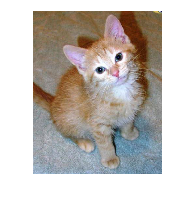

In [ ]:
flip_lr(open_image('imgs/cat_example.jpg')).show()

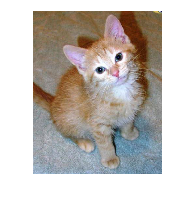

In [ ]:
open_image('imgs/cat_example.jpg').flip_lr().show()

The functions are deterministic transforms. The fastai library will then randomize them in two different ways:
- each transform can be defined with an argument named `p` representing the probability for it to be applied
- each argument that is type-annoted with a random function (like ùn

## What does a transform do?

Typically, a data augmentation operation will randomly modify an image input. This operation can apply to pixels (when we modify the contrast or brightness for instance) or to coordinates (when we do a rotation, a zoom or a resize). The operations that apply to pixels can easily be coded in numpy/pytorch, directly on an array/tensor but the ones that modify the coordinates are a bit more tricky.

They usually come in three steps: first we create a grid of coordinates for our picture: this is an array of size `h * w * 2` (`h` for height, `w` for width in the rest of this post) that contains in position i,j two floats representing the position of the pixel (i,j) in the picture. They could simply be the integers i and j, but since most transformations are centered with the center of the picture as origin, they’re usually rescaled to go from -1 to 1, (-1,-1) being the top left corner of the picture, (1,1) the bottom right corner (and (0,0) the center), and this can be seen as a regular grid of size h * w. Here is a grid what our grid would look like for a 5px by 5px image.

<img src="imgs/grid.png" alt="Example of grid" width="200">

Then, we apply the transformation to modify this grid of coordinates. For instance, if we want to apply an affine transformation (like a rotation) we will transform each of those vectors `x` of size 2 by `A @ x + b` at every position in the grid. This will give us the new coordinates, as seen here in the case of our previous grid.

<img src="imgs/grid_rot.png" alt="Example of grid rotated" width="300">

There are two problems that arise after the transformation: the first one is that the pixel values won’t fall exactly on the grid, and the other is that we can get values that get out of the grid (one of the coordinates is greater than 1 or lower than -1).

To solve the first problem, we use an interpolation. If we forget the rescale for a minute and go back to coordinates being integers, the result of our transformation gives us float coordinates, and we need to decide, for each (i,j), which pixel value in the original picture we need to take. The most basic interpolation called nearest neighbor would just round the floats and take the nearest integers. If we think in terms of the grid of coordinates (going from -1 to 1), the result of our transformation gives a point that isn’t in the grid, and we replace it by its nearest neighbor in the grid.

To be smarter, we can perform a [bilinear interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation). This takes an average of the values of the pixels corresponding to the four points in the grid surrounding the result of our transformation, with weights depending on how close we are to each of those points. This comes at a computational cost though, so this is where we have to be careful.

As for the values that go out of the picture, we treat them by padding it either:
- by adding zeros on the side, so the pixels that fall out will be black (black padding or zero padding)
- by replacing them by the value at the border (border padding)
- by mirroring the content of the picture on the other side (reflect padding).

## Be smart and efficient

Usually, data augmentation libraries have separated the different operations. So for a resize, we’ll go through the three steps above, then if we do a random rotation, we’ll go again to do those steps, then for a zoom etc... The fastai library works differently in thsense that it will do all the transformations on the coordinates at the same time, so that we only do those three steps once, especially the last one (the interpolation) that is the most heavy in computation.

The first thing is that we can regroup all affine transforms in just one (since an affine transform composed by an affine transform is another affine transform). This is already done in some other libraries but we pushed the thing one step further though to integrate the resize, the crop and any non-affine transformation of the coordinates in the process. Let’s dig in!

- In step 1, when we create the grid, we use the new size we want for our image, so `new_h, new_w` (and not `h, w`). This takes care of the resize operation.
- In step 2, we do only one affine transformation, by multiplying all the affine matrices of the transforms we want to do beforehand (those are 3 by 3 matrices, so it’s super fast), then we apply to the coords any non-affine transformation we might want (jitter, perspective wrappin, etc) before...
- Step 2.5: we crop (either center or randomly) the coordinates we want to keep. Crop is easy to do whenever we want, but by doing it just before the interpolation, we don’t compute pixel values that won’t be used at the end, gaining again a bit of efficiency
- Finally step 3: the final interpolation. Afterward, we can apply on the picture all the tranforms that operate pixel-wise (as said before brightness, contrast for instance) and we’re done with data augmentation.

This is why all transforms have an attribute (like `TfmAffine`, `TfmCoord`, `TfmCrop` or `TfmPixel`) so that the fastai library can regroup them and apply them all together at the right step. In terms of implementation:

- `affine_grid` is reponsible for creating the grid of coordinates
- `affine_mult` is in charge of doing the affin multiplication on that grid
- `apply_tfms` is the function that applies all the transforms on an Image
- `grid_sample`is the function that is responsible for the interpolation step

## Final result

TODO: add a comparison of speeds.

Also, adding a new transformation almost doesn’t hurt performance (since the costly steps are done only once) when with classic data aug implementations, it usually result in a longer training time.

Even in terms of final result, doing only one interpolation gives a better result: if we stack several transforms and do an interpolation on each one, we approximate the true value of our coordinates in some way, which tends to blur a bit the image. By regrouping all the transformations together and only doing this step at the end, we can get something nicer.

Look at how the same rotation then zoom done separately (so with two interpolations)

<img src="imgs/two_interpol.png" alt="Image interpolated twice" width="300">

is blurrier than regrouping the transforms and doing just one interpolation

<img src="imgs/one_interpol.png" alt="Image interpolated once" width="300">

## Randomness

To get more diversity, data augmentation usually applies random operation. If can be
- a probability to apply the operation (example: flip with a chance of 0.5)
- or a parameter value that is random (example: rotate by something between -10 and 10 degrees)

Transforms are defined as deterministic functions inside the library, which then knows it can be randomized through type hinting. For instance, in the source code of `rotate`, the argument degrees doesn't have a type-hinting of float but uniform. This means that you can call 
``` python
rotate(degrees = (-10,10))
```
to create a transform that will randomly rotate the picture by an angle between -10 and 10 degrees. All transforms automatically have a kwarg named p that defines the probabiliy of it being applied, so we could also call
``` python
rotate(degrees = (-10,10), p=0.75)
```
to say we only want this random rotation to be applied with a probability of 0.75.

The resolved arguments (the ones picked randomly) are then saved inside the transform in case we need to apply the exact same transform again: when studying a classification problem, we can apply any transformation to an iamge without changing its label, but in a segmentation or an object localization task, we need to change the target (either a mask or a bounding box) the exact same way as we did the input:

<img src="imgs/tfm_mask.png" alt="Data augmentation in a segmentation task" width="400">

Here the target is of type `ImageMask`so that the transforms like brightness or contrast are ignored when applied to it.

<img src="imgs/tfm_bbox.png" alt="Data augmentation in an object detection task" width="400">

Here the target is of type `ImageBBox` so that the transforms are applied to a rectangular mask representing the box, then converted to a new bounding box (the smallest one containing the entire mask) when we pull its data attribute.

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.vision.transform import * 

### Global Variable Definitions:

In [ ]:
show_doc(affine_grid)

#### <a id=affine_grid></a>**affine_grid**(<em>size</em>: int,=Tuple[int,)

`affine_grid`

In [ ]:
show_doc(affine_mult)

#### <a id=affine_mult></a>**affine_mult**(<em>c</em>=torch.Tensor, <em>m</em>=torch.Tensor)


Multiply `c` by `m` - can adjust for rectangular shaped `c`

`affine_mult`

In [ ]:
show_doc(apply_perspective)

#### <a id=apply_perspective></a>**apply_perspective**(<em>coords</em>=torch.Tensor, <em>coeffs</em>: float]]=Collection[Tuple[float,)


Transform `coords` with `coeffs`

`apply_perspective`

In [ ]:
show_doc(apply_tfms)

#### <a id=apply_tfms></a>**apply_tfms**(<em>tfms</em>: Collection[fastai.vision.transform.Transform]]=Union[fastai.vision.transform.Transform,, <em>x</em>=torch.Tensor, <em>do_resolve</em>: True=bool, <em>xtra</em>: dict],=Union[Dict[fastai.vision.transform.Transform,, <em>size</em>: Tuple[int,=Union[int,, <em>mult</em>: 32=int, <em>do_crop</em>: True=bool, <em>padding_mode</em>: 'reflect'=str, <em>**kwargs</em>=Any)


Apply all `tfms` to `x` - `do_resolve`: bind random args - size,mult used to crop/pad

`apply_tfms`

In [ ]:
show_doc(compute_zs_mat)

#### <a id=compute_zs_mat></a>**compute_zs_mat**(<em>sz</em>: int,=Tuple[int,, <em>scale</em>=float, <em>squish</em>=float, <em>invert</em>=bool, <em>row_pct</em>=float, <em>col_pct</em>=float)


Utility routine to compute zoom/squish matrix

`compute_zs_mat`

In [ ]:
show_doc(find_coeffs)

#### <a id=find_coeffs></a>**find_coeffs**(<em>orig_pts</em>: float]]=Collection[Tuple[float,, <em>targ_pts</em>: float]]=Collection[Tuple[float,)


Find 8 coeff mentioned [here](https://web.archive.org/web/20150222120106/xenia.media.mit.edu/~cwren/interpolator/)

`find_coeffs`

In [ ]:
show_doc(get_crop_target)

#### <a id=get_crop_target></a>**get_crop_target**(<em>target_px</em>: Tuple[int,=Union[int,, <em>mult</em>: 32=int)


Calc crop shape of `target_px` to nearest multiple of `mult`

`get_crop_target`

In [ ]:
show_doc(get_default_args)

#### <a id=get_default_args></a>**get_default_args**(<em>func</em>=Callable)

`get_default_args`

In [ ]:
show_doc(get_resize_target)

#### <a id=get_resize_target></a>**get_resize_target**(<em>img</em>, <em>crop_target</em>, <em>do_crop</em>=False)


Calc size of `img` to fit in `crop_target` - adjust based on `do_crop`

`get_resize_target`

`get_transforms`

In [ ]:
show_doc(get_zoom_mat)

#### <a id=get_zoom_mat></a>**get_zoom_mat**(<em>sw</em>=float, <em>sh</em>=float, <em>c</em>=float, <em>r</em>=float)


`sw`,`sh` scale width,height - `c`,`r` focus col,row

`get_zoom_mat`

In [ ]:
show_doc(grid_sample)

#### <a id=grid_sample></a>**grid_sample**(<em>x</em>=torch.Tensor, <em>coords</em>=torch.Tensor, <em>mode</em>: 'bilinear'=str, <em>padding_mode</em>: 'reflect'=str)


Grab pixels in `coords` from `input` sampling by `mode`. pad is reflect or zeros.

`grid_sample`

In [ ]:
show_doc(Image)

### <a id=Image></a><em>class</em> **Image**() :: Inherits from (`ImageBase`)


Supports appying transforms to image data

`Image`

In [ ]:
show_doc(Image.affine)

#### <a id=affine></a>**affine**(<em>self</em>, <em>func</em>: Any]],, <em>*args</em>, <em>**kwargs</em>=Callable[[Dict[str,)


Equivalent to `image.affine_mat = image.affine_mat @ func()`

`Image.affine`

In [ ]:
show_doc(Image.brightness)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.brightness`

In [ ]:
show_doc(Image.contrast)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.contrast`

In [ ]:
show_doc(Image.coord)

#### <a id=coord></a>**coord**(<em>self</em>, <em>func</em>: Tuple[int,, <em>*args</em>, <em>**kwargs</em>=Callable[[torch.Tensor,)


Equivalent to `image.flow = func(image.flow, image.size)`

`Image.coord`

In [ ]:
show_doc(Image.crop)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.crop`

In [ ]:
show_doc(Image.crop_pad)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.crop_pad`

In [ ]:
show_doc(Image.dihedral)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.dihedral`

In [ ]:
show_doc(Image.flip_lr)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.flip_lr`

In [ ]:
show_doc(Image.jitter)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.jitter`

In [ ]:
show_doc(Image.lighting)

#### <a id=lighting></a>**lighting**(<em>self</em>, <em>func</em>: Collection[Any],=Callable[[torch.Tensor,, <em>*args</em>=Any, <em>**kwargs</em>=Any)


Equivalent to `image = sigmoid(func(logit(image)))`

`Image.lighting`

In [ ]:
show_doc(Image.pad)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.pad`

In [ ]:
show_doc(Image.perspective_warp)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.perspective_warp`

In [ ]:
show_doc(Image.pixel)

#### <a id=pixel></a>**pixel**(<em>self</em>, <em>func</em>: Collection[Any],, <em>*args</em>, <em>**kwargs</em>=Callable[[torch.Tensor,)


Equivalent to `image.px = func(image.px)`

`Image.pixel`

In [ ]:
show_doc(Image.refresh)

#### <a id=refresh></a>**refresh**(<em>self</em>)


Applies any logit or affine transfers that have been

`Image.refresh`

In [ ]:
show_doc(Image.resize)

#### <a id=resize></a>**resize**(<em>self</em>, <em>size</em>: Tuple[int,=Union[int,)


Resize the image to `size`, size can be a single int

`Image.resize`

In [ ]:
show_doc(Image.rotate)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.rotate`

In [ ]:
show_doc(Image.show)

#### <a id=_show></a>**_show**(<em>self</em>, <em>ax</em>: None=fastai.vision.transform.Image, <em>y</em>: None=matplotlib.axes._axes.Axes, <em>**kwargs</em>=fastai.vision.transform.Image)

`Image.show`

In [ ]:
show_doc(Image.skew)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.skew`

In [ ]:
show_doc(Image.squish)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.squish`

In [ ]:
show_doc(Image.symmetric_warp)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.symmetric_warp`

In [ ]:
show_doc(Image.tilt)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.tilt`

In [ ]:
show_doc(Image.zoom)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.zoom`

In [ ]:
show_doc(Image.zoom_squish)

#### <a id=<lambda>></a>**<lambda>**(<em>x</em>, <em>*args</em>, <em>**kwargs</em>)

`Image.zoom_squish`

In [ ]:
show_doc(ImageBase)

### <a id=ImageBase></a><em>class</em> **ImageBase**() :: Inherits from (`ItemBase`)


Img based `Dataset` items derive from this. Subclass to handle lighting, pixel, etc

`ImageBase`

In [ ]:
show_doc(ImageBase.affine)

#### <a id=affine></a>**affine**(<em>self</em>, <em>func</em>: Any]],, <em>*args</em>, <em>**kwargs</em>=Callable[[Dict[str,)

`ImageBase.affine`

In [ ]:
show_doc(ImageBase.clone)

#### <a id=clone></a>**clone**(<em>self</em>)


Clones this item and its `data`

`ImageBase.clone`

In [ ]:
show_doc(ImageBase.coord)

#### <a id=coord></a>**coord**(<em>self</em>, <em>func</em>: Tuple[int,, <em>*args</em>, <em>**kwargs</em>=Callable[[torch.Tensor,)

`ImageBase.coord`

In [ ]:
show_doc(ImageBase.lighting)

#### <a id=lighting></a>**lighting**(<em>self</em>, <em>func</em>: Collection[Any],, <em>*args</em>, <em>**kwargs</em>=Callable[[torch.Tensor,)

`ImageBase.lighting`

In [ ]:
show_doc(ImageBase.pixel)

#### <a id=pixel></a>**pixel**(<em>self</em>, <em>func</em>: Collection[Any],, <em>*args</em>, <em>**kwargs</em>=Callable[[torch.Tensor,)

`ImageBase.pixel`

In [ ]:
show_doc(ImageBase.set_sample)

#### <a id=set_sample></a>**set_sample**(<em>self</em>, <em>**kwargs</em>)


Set parameters that control how we `grid_sample` the image after transforms are applied

`ImageBase.set_sample`

In [ ]:
show_doc(ImageBBox)

### <a id=ImageBBox></a><em>class</em> **ImageBBox**() :: Inherits from (`ImageMask`)


Image class for bbox-style annotations

`ImageBBox`

In [ ]:
show_doc(ImageBBox.clone)

#### <a id=clone></a>**clone**(<em>self</em>)


Clones this item and its `data`

`ImageBBox.clone`

In [ ]:
show_doc(ImageBBox.create)

#### <a id=create></a>**create**(<em>bboxes</em>=Collection[Collection[int]], <em>h</em>=int, <em>w</em>=int)


Creates an ImageBBox object from bboxes

`ImageBBox.create`

In [ ]:
show_doc(ImageMask)

### <a id=ImageMask></a><em>class</em> **ImageMask**() :: Inherits from (`Image`)


Class for image segmentation target

`ImageMask`

In [ ]:
show_doc(ImageMask.lighting)

#### <a id=lighting></a>**lighting**(<em>self</em>, <em>func</em>: Collection[Any],=Callable[[torch.Tensor,, <em>*args</em>=Any, <em>**kwargs</em>=Any)


Equivalent to `image = sigmoid(func(logit(image)))`

`ImageMask.lighting`

In [ ]:
show_doc(ImageMask.refresh)

#### <a id=refresh></a>**refresh**(<em>self</em>)


Applies any logit or affine transfers that have been

`ImageMask.refresh`

In [ ]:
show_doc(log_uniform)

#### <a id=log_uniform></a>**log_uniform**(<em>low</em>, <em>high</em>, <em>size</em>=None)


Draw 1 or shape=`size` random floats from uniform dist: min=log(`low`), max=log(`high`)

`log_uniform`

In [ ]:
show_doc(logit)

#### <a id=logit></a>**logit**(<em>x</em>=torch.Tensor)

`logit`

In [ ]:
show_doc(logit_)

#### <a id=logit_></a>**logit_**(<em>x</em>=torch.Tensor)

`logit_`

In [ ]:
show_doc(rand_bool)

#### <a id=rand_bool></a>**rand_bool**(<em>p</em>=float, <em>size</em>=None)


Draw 1 or shape=`size` random booleans (True occuring probability p)

`rand_bool`

In [ ]:
show_doc(rand_crop)

#### <a id=rand_crop></a>**rand_crop**(<em>*args</em>, <em>**kwargs</em>)


Random crop and pad

`rand_crop`

In [ ]:
show_doc(rand_int)

#### <a id=rand_int></a>**rand_int**(<em>low</em>=int, <em>high</em>=int)

`rand_int`

In [ ]:
show_doc(rand_zoom)

#### <a id=rand_zoom></a>**rand_zoom**(<em>*args</em>, <em>**kwargs</em>)


Random zoom tfm

`rand_zoom`

In [ ]:
show_doc(RandTransform)

### <a id=RandTransform></a><em>class</em> **RandTransform**(<em>kwargs</em>=dict, <em>p</em>: 1.0=int, <em>resolved</em>: <factory>=dict, <em>do_run</em>: True=bool, <em>is_random</em>: True=bool)


Wraps `Transform` to add randomized execution

`RandTransform`

In [ ]:
show_doc(RandTransform.resolve)

#### <a id=resolve></a>**resolve**(<em>self</em>)


Bind any random variables needed tfm calc

`RandTransform.resolve`

In [ ]:
show_doc(resolve_tfms)

#### <a id=resolve_tfms></a>**resolve_tfms**(<em>tfms</em>: Collection[fastai.vision.transform.Transform]]=Union[fastai.vision.transform.Transform,)


Resolve every tfm in `tfms`

`resolve_tfms`

In [ ]:
show_doc(round_multiple)

#### <a id=round_multiple></a>**round_multiple**(<em>x</em>=int, <em>mult</em>=int)


Calc `x` to nearest multiple of `mult`

`round_multiple`

In [ ]:
show_doc(TfmAffine)

### <a id=TfmAffine></a><em>class</em> **TfmAffine**(<em>order</em>: NoneType]=Union[int,) :: Inherits from (`Transform`)


Wraps affine tfm funcs

`TfmAffine`

In [ ]:
show_doc(TfmCoord)

### <a id=TfmCoord></a><em>class</em> **TfmCoord**(<em>order</em>: NoneType]=Union[int,) :: Inherits from (`Transform`)


Utility class for adding probability and wrapping support to transform funcs

`TfmCoord`

In [ ]:
show_doc(TfmCrop)

### <a id=TfmCrop></a><em>class</em> **TfmCrop**(<em>order</em>: NoneType]=Union[int,) :: Inherits from (`TfmPixel`)


Wraps pixel tfm funcs

`TfmCrop`

In [ ]:
show_doc(TfmLighting)

### <a id=TfmLighting></a><em>class</em> **TfmLighting**(<em>order</em>: NoneType]=Union[int,) :: Inherits from (`Transform`)


Utility class for adding probability and wrapping support to transform funcs

`TfmLighting`

In [ ]:
show_doc(TfmPixel)

### <a id=TfmPixel></a><em>class</em> **TfmPixel**(<em>order</em>: NoneType]=Union[int,) :: Inherits from (`Transform`)


Wraps pixel tfm funcs

`TfmPixel`

In [ ]:
show_doc(Transform)

### <a id=Transform></a><em>class</em> **Transform**(<em>order</em>: NoneType]=Union[int,)


Utility class for adding probability and wrapping support to transform funcs

`Transform`

In [ ]:
show_doc(Transform.calc)

#### <a id=calc></a>**calc**(<em>tfm</em>, <em>x</em>=fastai.vision.transform.Image, <em>*args</em>=Any, <em>**kwargs</em>=Any)


Apply our `tfm` to image `x`, wrapping it if necessary

`Transform.calc`

In [ ]:
show_doc(uniform)

#### <a id=uniform></a>**uniform**(<em>low</em>=numbers.Number, <em>high</em>=numbers.Number, <em>size</em>: None=List[int])


Draw 1 or shape=`size` random floats from uniform dist: min=`low`, max=`high`

`uniform`

In [ ]:
show_doc(uniform_int)

#### <a id=uniform_int></a>**uniform_int**(<em>low</em>=numbers.Number, <em>high</em>=numbers.Number, <em>size</em>: NoneType]=Union[List[int],)


Generate int or tensor `size` of ints from uniform(`low`,`high`)

`uniform_int`

In [ ]:
show_doc(zoom_crop)

#### <a id=zoom_crop></a>**zoom_crop**(<em>scale</em>, <em>do_rand</em>=False, <em>p</em>=1.0)


Randomly zoom and/or crop

`zoom_crop`